In [49]:
#importing libraries for numpy, plot and pandas

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn. model_selection import KFold
from sklearn. model_selection import cross_val_score 
from sklearn.linear_model import LogisticRegression 
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [50]:
#reading the dataset

dataset = datasets.load_breast_cancer()
X = dataset.data
Y = dataset.target

In [51]:
#splitting the dataset using train_test_split

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, test_size = 0.2, random_state = 100)

In [52]:
#scaling the input data using standardiztion

from sklearn.preprocessing import StandardScaler
stdScale_X = StandardScaler()
X_train = stdScale_X.fit_transform(X_train)
X_test = stdScale_X.transform(X_test)

In [53]:
#Importing logistic regression and training the classifier

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(penalty='l2',C=1,random_state=0)
classifier.fit(X_train, Y_train)

LogisticRegression(C=1, random_state=0)

In [54]:
#evaluating the classifier using the evaluation set

Y_pred = classifier.predict(X_test)

In [55]:
Y_pred[0:10]

array([0, 1, 0, 1, 1, 1, 0, 0, 1, 1])

In [56]:
#importing metrics and reporting the accuracy, precision and recall

from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))
print("Precision:",metrics.precision_score(Y_test, Y_pred))
print("Recall:",metrics.recall_score(Y_test, Y_pred))

Accuracy: 0.9736842105263158
Precision: 0.9558823529411765
Recall: 1.0


In [57]:
# creating confusion matrix

from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(Y_test, Y_pred)
cnf_matrix

array([[46,  3],
       [ 0, 65]], dtype=int64)

Text(0.5, 427.9555555555555, 'Predicted Label')

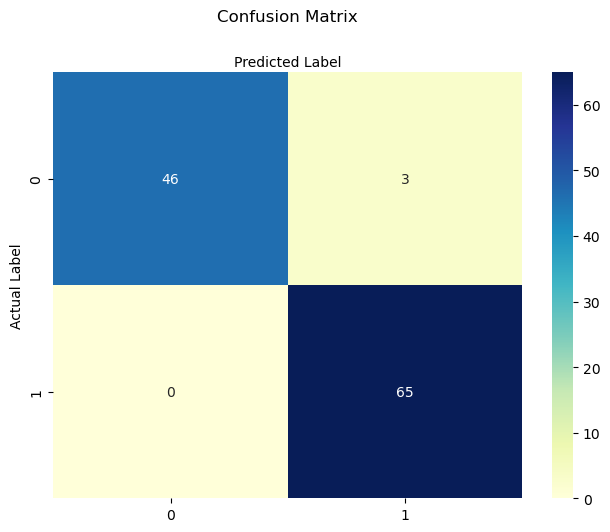

In [58]:
#plotting confusion matrix

import seaborn as sns
class_names=[0,1] # name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix', y=1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')